In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Read the saved BGG database
game_df = pd.read_json('bgg_database.json')

In [3]:
game_df.head()

,attributes,average_rating,description,last_updated,name,num_voters,play_time,player_count,rank,ratings,weight,weighted_rating,year
1,"{u'boardgamedesigner': u'Karl-Heinz Schmiel', ...",7.64052,Die Macher is a game about seven sequential po...,Tue Jan 29 22:56:21 2019,Die Macher,4752,240,"{u'1': {u'Recommended': u'1', u'Not Recommende...",208,"{u'aSoso': u'10', u'Annagul': u'7', u'the_ka':...",4.3434,7.20468,1986
10,"{u'boardgamedesigner': u'Alan R. Moon', u'boar...",6.73401,Elfenland is a redesign of the original White ...,Tue Jan 29 22:25:44 2019,Elfenland,7302,60,"{u'6+': {u'Recommended': u'1', u'Not Recommend...",850,"{u'Igorken': u'6', u'druvey': u'4', u'Joverowa...",2.1620,6.54036,1998
100169,"{u'boardgamedesigner': u'Robert Leonhard', u'b...",7.57304,Historic Gaming #7&#10;&#10;Hero of Weehawken ...,Wed Jan 30 00:49:00 2019,Hero of Weehawken,146,45,"{u'1': {u'Recommended': u'1', u'Not Recommende...",3965,"{u'userid122002': u'7', u'dougadamsau': u'8', ...",2.1579,5.72521,2011
100172,"{u'boardgamedesigner': u'Brad Champeny', u'boa...",6.81274,The King's birthday has arrived! Wealthy arist...,Wed Jan 30 00:49:06 2019,Seven Sisters,144,60,"{u'6+': {u'Recommended': u'0', u'Not Recommend...",5653,"{u'skelebone': u'8', u'infinity13': u'7.5', u'...",2.4118,5.62356,2012
1002,"{u'boardgamedesigner': u'Urs Hostettler', u'bo...",6.90081,Cosmic Eidex is an intriguing little trick-tak...,Wed Jan 30 00:33:14 2019,Cosmic Eidex,442,60,"{u'1': {u'Recommended': u'0', u'Not Recommende...",2783,"{u'dakarp': u'8', u'hurrlipurr': u'7', u'sanny...",2.6909,5.87718,1998


In [9]:
# Create a dataframe of only the user, game, and score for each game
ratings = []
for i, row in game_df.iterrows():
    for user, score in row.ratings.iteritems():
        rating = (row['name'], user, float(score))
        ratings.append(rating)
ratings = pd.DataFrame(ratings, columns = ['name', 'user', 'score'])

In [10]:
ratings.head()

,name,user,score
0,Die Macher,aSoso,10
1,Die Macher,Annagul,7
2,Die Macher,the_ka,9
3,Die Macher,treece keenes,1
4,Die Macher,dakarp,7


In [4]:
# Find the distribution of number of ratings each user has given

rating_counts = ratings.groupby('user').size().reset_index()
rating_counts.columns = ['user', 'freq']
rating_counts = rating_counts.sort_values('freq', ascending=False)
print str(len(rating_counts)) + ' users have rated at least 1 game.'
rating_counts.head()

270383 users have rated at least 1 game.


,user,freq
203147,leffe dubbel,5390
30846,Doel,3182
119456,TomVasel,2994
125480,Walt Mulder,2936
49627,Hessu68,2830


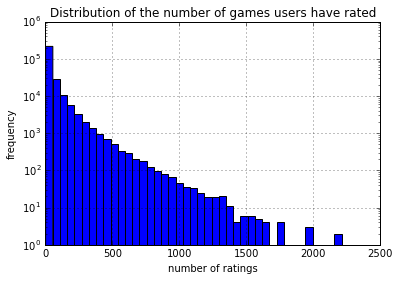

In [5]:
# Visualize above distribution

rating_counts.hist(column = 'freq', bins = 100)
plt.title('Distribution of the number of games users have rated')
plt.yscale('log')
plt.ylabel('frequency')
plt.xlabel('number of ratings')
plt.xlim(0, 2500)
plt.show()

In [6]:
# Remove users who have not rated many games

high_n_users = rating_counts[rating_counts.freq >=50]
print str(len(high_n_users)) + ' users have rated at least 50 games.'
high_n_users.tail()

59715 users have rated at least 50 games.


,user,freq
157340,d5884jp,50
55612,JasperJones,50
54313,JVB7878,50
1028,77rpm,50
226739,paxpain,50


In [10]:
ratings_red = ratings[ratings['user'].isin(high_n_users['user'])]
n_users = ratings_red.user.unique().shape[0]
n_games = ratings_red.name.unique().shape[0]
print str(n_users) + ' users'
print str(n_games) + ' games'

59715 users
6949 games


In [33]:
# Save matrix with only the most frequest raters

ratings_red.to_json('ratings_reduced.json')